### Problem Statement

For starters let us write an agent to solve a simple optimization problem.
1. Data Generator: Write a piece of code which produces our ground truth data as
y=f(x) where f(x) = −0.2 + 0.4 ∗ x and x should be in the range [-1,1]. Produce a
plot of f(x).
2. Function: The function we’d like to fit is f(x; α, β) = α + β ∗ x Write a piece of
code which produces ŷ = f(x; α, β). Produce a plot for all parameters equal to one.
3. Discretized Space: Let also be α and β be in the range [-1,1]. Their values should
be discretized with stepsize 0.2. Plot this space as squares in a plane where each
discrete pair is denoted by a dot in the middle of one of the squares (should be 64
squares in the end).
4. Rewards: Use the RMSE value at a given point to come up with rewards for this
space, i.e lower RMSE should give more reward then higher RMSE. Add the
Rewards to your plot from 3.
5. Q Learning: Write an agent which is able to walk this discrete space to find the
parameters of the true data generator.

In [1]:
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def data_generator(input_data):
    """
    Generate ground truth data (y) based on
    y=f(x) where f(x) = −0.2 + 0.4 ∗ x
    """
    return -0.2 + 0.4 * input_data

def fit_function(x, alpha, beta):
    """
    Return predicted value (y_bar)
    """
    return alpha + beta * x

def discrete_parameter_space(input_range, step_size=0.2):
    """
    We have alpha and beta parameters for the model.
    We are creating discrete parameter space for the modeling purpose.
    """
    return np.arange(input_range[0]+step_size, input_range[1], step_size)

def rmse_func(targets, predictions):
    """
    it calculate the root mean square value
    """
    return np.sqrt(np.mean((predictions-targets)**2))

def reward_func(current_input):
    """
    Let us discretize the rewards (we can also use continuous rewards based on rmse value))
    """
    if current_input < 0.1:
        return 20
    elif current_input < 0.5:
        return 10
    elif current_input < 1:
        return 5
    else:
        # making sure higher rmse gets lower reward
        return -1 * current_input
    

### 1. Generate Ground Truth

In [3]:
input_range = (-1, 1)
data_length = 20
input_data = np.linspace(input_range[0], input_range[1], data_length)
ground_truth = data_generator(input_data)

In [4]:
ground_truth

array([-0.6       , -0.55789474, -0.51578947, -0.47368421, -0.43157895,
       -0.38947368, -0.34736842, -0.30526316, -0.26315789, -0.22105263,
       -0.17894737, -0.13684211, -0.09473684, -0.05263158, -0.01052632,
        0.03157895,  0.07368421,  0.11578947,  0.15789474,  0.2       ])

### 2. Plot Grouth Truth

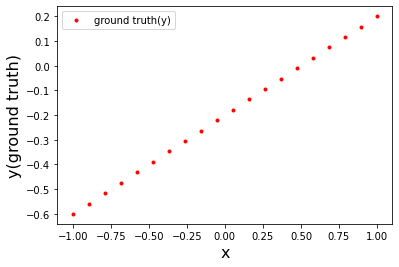

In [5]:
index = np.linspace(input_range[0], input_range[1], data_length)
plt.plot(index, ground_truth, 'r.', label='ground truth(y)') # x
plt.legend(loc="upper left")
plt.xlabel('x', fontsize=16)
plt.ylabel('y(ground truth)', fontsize=16)
plt.show()

### 3. Fit model (f(x; α, β) = α + β ∗ x) with α, β = 1

In [6]:
alpha = 1
beta = 2
fitted_values = fit_function(input_data, alpha, beta)

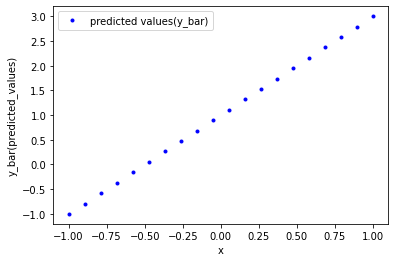

In [7]:
plt.plot(index, fitted_values, 'b.', label='predicted values(y_bar)') # x

plt.legend(loc="upper left")
plt.xlabel('x', fontsize=10)
plt.ylabel('y_bar(predicted_values)', fontsize=10)
plt.show()

### 4. Discretize the parameter space and create square maze

In [8]:
discrete_alphas = discrete_parameter_space(input_range)
discrete_betas = discrete_parameter_space(input_range)

In [9]:
discrete_alphas, discrete_betas

(array([-8.00000000e-01, -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,
        -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,  6.00000000e-01,
         8.00000000e-01]),
 array([-8.00000000e-01, -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,
        -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,  6.00000000e-01,
         8.00000000e-01]))

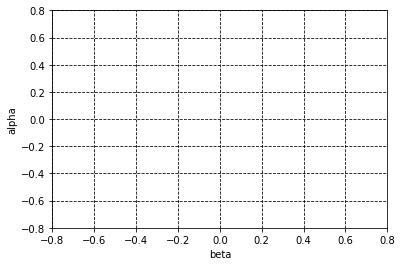

In [10]:
fig, ax = plt.subplots()
ax.set_xlim((-0.8,0.8))
ax.set_ylim((-0.8,0.8))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.grid(b=True, which='major', color='k', linestyle='--')
# fig.savefig('test.png', dpi=600)
# plt.close(fig)
plt.xlabel('beta', fontsize=10)
plt.ylabel('alpha', fontsize=10)
plt.show()

### 5. Plot the rewards on the space based on RMSE value

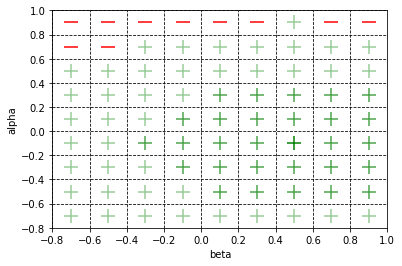

In [11]:
# apply alpha, beta pair from discrete_alphas, discrete_betas to calculate the rewards
reward_matrix = []
positive_reward_20_spaces = []
positive_reward_10_spaces = []
positive_reward_5_spaces = []
negative_reward_spaces = []
for alpha in discrete_alphas:
    reward_row = []
    for beta in discrete_betas:
        predictions = fit_function(input_data, alpha, beta)
        rmse = rmse_func(ground_truth, predictions)
        reward = reward_func(rmse)
        if reward == 20:
            positive_reward_20_spaces.append([beta + 0.1, alpha+0.1])
        elif reward == 10:
            positive_reward_10_spaces.append([beta + 0.1, alpha+0.1])
        elif reward == 5:
            positive_reward_5_spaces.append([beta + 0.1, alpha+0.1])
        else:
            negative_reward_spaces.append([beta + 0.1, alpha+0.1])
        reward_row.append(reward)
    
    reward_matrix.append(reward_row)

fig, ax = plt.subplots()
# + for positive reward and - for negative reward indicators
# using alpha value for giving higher alpha to higher reward place
ax.scatter(*zip(*positive_reward_20_spaces), c='green', marker='+', s=200)
ax.scatter(*zip(*positive_reward_10_spaces), c='green', marker='+', s=200, alpha=0.7)
ax.scatter(*zip(*positive_reward_5_spaces), c='green', marker='+', s=200, alpha=0.4)
ax.scatter(*zip(*negative_reward_spaces), c='red', marker='_', s=200)
ax.set_xlim((-0.8,1))
ax.set_ylim((-0.8,1))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
# ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', color='k', linestyle='--')
# fig.savefig('test.png', dpi=600)
# plt.close(fig)
plt.xlabel('beta', fontsize=10)
plt.ylabel('alpha', fontsize=10)
plt.show()

### 6. Q-learning 

In [13]:
# corresponding alpha, beta position starts from (-0.8, -.0.8) as origin
# rewards table
R = np.array(reward_matrix)
# Q table
Q = np.zeros_like(R)


In [16]:
R.shape

(81,)

In [17]:
R = R.ravel()
R[8]

5.0

In [18]:
def set_initial_state(n_states, random_state):
    states = list(range(n_states))
    random_state.shuffle(states)
    initial_state = states[0]
    return initial_state

def sample_action_space(n_actions, current_state):
    actions = []
    for j in range(9):
        if R[current_state,j] > 1:
            actions.append(j)
    action = np.random.choice(actions)
    return action

def step(current_state, action):
    """
    Return next state based on action in current_state
    """
    if (action == 0): # UP
        return current_state - 9, R[current_state - 9]
    elif (action == 1): # RIGHT
        return current_state + 1, R[current_state +1]
    elif (action == 2): # DOWN
        return current_state + 9, R[current_state + 9]
    else: # LEFT
        return current_state - 1, R[current_state - 1]
    

def q_index_repr(state, action):
    return "{}-{}".format(state, action)

def get_q_value(q_ind):
#     if not q_ind:
#         q_ind = q_index_repr(state, action)
    return Q.get(q_ind, 0.0)

def update_Q_value(state, action, reward, next_state, lr, gamma):
    """
    Q[state, action] = Q[state, action] + lr * (reward + gamma * np.max(Q[new_state, :]) — Q[state, action])
    """
    q_ind = q_index_repr(state, action)
    current_Q = get_q_value(q_ind)
    best_Q = max([get_q_value(q_index_repr(state, action)) for action in action_space])
    new_Q = current_Q + lr * (reward + gamma * best_Q - current_Q)
    Q[q_ind] = new_Q
    
def is_move_direction_valid(curr_pos, nxt_pos):
    """
    If agent is at the right corner then it can't make right move
    or if in left corner of the maze, can't make left move.
    """
    if curr_pos !=0 and curr_pos % (9-1) == 0 and nxt_pos % 9 ==0: 
        return False # which move is invalid
    elif curr_pos != 0 and curr_pos % 9 == 0 and nxt_pos % (9-1) == 0 :
        return False
    else:
        return True

def is_move_inside_maze(curr_pos):
    """
    Checking the next state positions always remains inside maze.
    """
    return curr_pos in range(81)

def check_valid_move(curr_pos, nxt_pos):
    is_valid = True
    
    is_inside_maze = is_move_inside_maze(nxt_pos)
    is_valid_direction = is_move_direction_valid(curr_pos, nxt_pos)
    
    return is_inside_maze and is_valid_direction

def get_valid_actions(current_pos):
    
    """
    From each cell, you have move one position UP, RIGHT, DOWN, LEFT.
    -9/+9 represents one step up and down when we are representing states with integers from 0 to 81
    """
    states = [current_pos-9, current_pos+1, current_pos + 9, current_pos - 1]
#     possible_states = list(map(check_valid_move, states))
    possible_states = [check_valid_move(current_pos, nxt_pos) for nxt_pos in states]
    valid_actions = [a for a, x in enumerate(possible_states) if x]
    return valid_actions

In [25]:
'''
Q learning steps:

1. Initialize the Q-table with zeros.
2. Start exploring: For each state, select one among all possible actions for the current state (S).
3. Travel to the next state (S') as a result of that action (a).
4. For all possible actions from the state (S') select the one with the highest Q-value.
5. Update Q-table values using the equation.
6. Set the next state as the current state.
7. If goal state is reached, then end and repeat the process.

'''
# set hyperparameters
gamma = 0.8 # discount factor 
lr = 0.9 # learning rate
n_episodes = 5
grid_shape = (9, 9)
state_space = range(81)
action_space = range(4)
# UP = 0
# RIGHT = 1
# DOWN = 2
# LEFT = 3
Q = {}
# four moves left, right, up, down
actions = 4
epsilon = 0.05
# random_state = np.random.RandomState(10)
for e in range(n_episodes):
    # current_state = set_initial_state(states, random_state)
    current_state = 0
    complete = False
    while not complete:
        valid_actions = get_valid_actions(current_state)
        if random.uniform(0, 1) < epsilon:
            # we explore the action space
            action = random.choice(valid_actions)
        else:
            # exploit the knowledge
            q_values = {a: get_q_value(q_index_repr(current_state,a)) for a in valid_actions}
            max_q = max(q_values.values())
            # if we have multiple state with max q values, we choose randomly
            actions_with_max_q = [a for a, q in q_values.items() if q == max_q]
            action = np.random.choice(actions_with_max_q)
        
        next_state, reward = step(current_state, action)
        update_Q_value(current_state, action, reward, next_state, lr, gamma)
        if reward > 10.0:
            complete = True
            print('one path completed')
        
        current_state = next_state
        print('current state after completion', current_state)

# solution_x = 
# print('the solution is', )

current state after completion 1
current state after completion 10
current state after completion 19
current state after completion 28
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 28
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state after completion 46
current state after completion 37
current state a

# COMMENT : since final state is '33', we have to reverse lookup the table above for the corresponding alpha and beta values

## We saw that alpha = -0.2 and beta = 0.4

In [23]:
np.unravel_index(33, (9,9))

(3, 6)

In [24]:
# verification
alpha = -0.2
beta = 0.4
predictions = fit_function(input_data, alpha, beta)
rmse = rmse_func(ground_truth, predictions)
reward = reward_func(rmse)
reward

20